# Task 1: Prediction using Supervised ML
## Field:
Data Science & Business Analytics Internship

## Objective: 
- Using Linear Regression model to predict the percentage score of an student based on the no. of study hours. 

## Tools and Technologies Used
- Python
- Numpy
- Pandas
- Matplotlib, Seaborn
- Scikit-Learn
- Google Colab

## Submitted By:
- [Anish Shilpakar](https://www.linkedin.com/in/anish-shilpakar13/)
- Email: anishshilpakar8@gmail.com

**GRIP@THE SPARKS FOUNDATION**

Imports

In [18]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings  

To ignore warnings

In [2]:
warnings.filterwarnings(action="ignore")

Import data

In [3]:
data_url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(data_url)
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Understanding given data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

No nan values found in given dataset so cleaning is not needed

Visualizing given data

In [19]:
matplotlib.rcParams['figure.figsize'] = (10, 10)

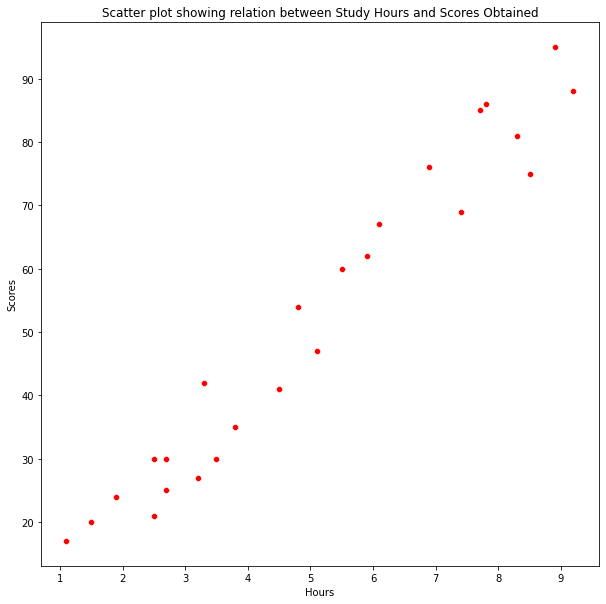

In [20]:
sns.scatterplot(x=data['Hours'],y=data['Scores'],color='r')
plt.title("Scatter plot showing relation between Study Hours and Scores Obtained")
plt.show()

Regression plot for given data

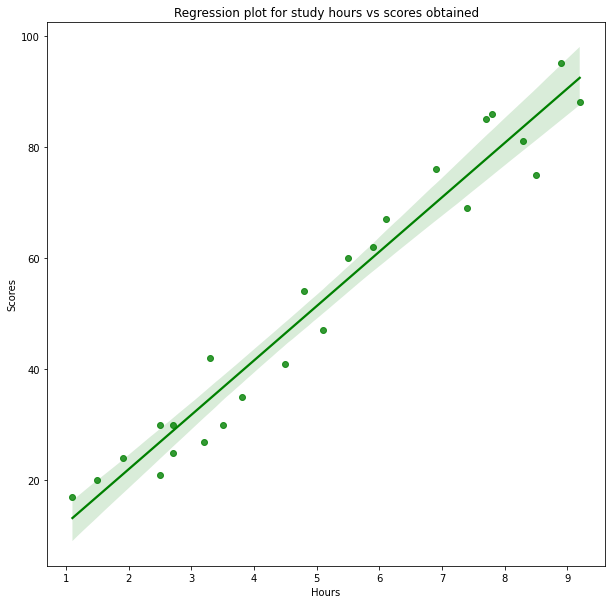

In [34]:
sns.regplot(x=data['Hours'],y=data['Scores'],color='g')
plt.title("Regression plot for study hours vs scores obtained")
plt.show()

It can be seen from this visualization that there is direct correlation between the number of study hours and scores obtained by student.   

It can also be seen from correlation plot below

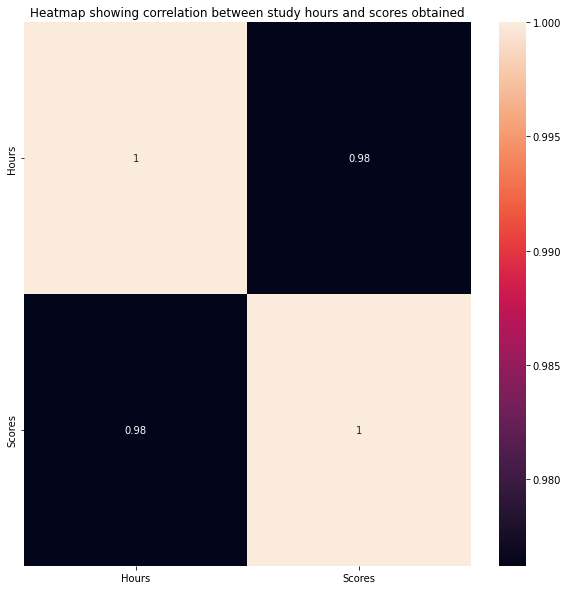

In [21]:
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.title("Heatmap showing correlation between study hours and scores obtained")
plt.show()

Dividing data to features and target

In [13]:
y = data["Scores"] #target
X = data.drop(columns="Scores") #features
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
# checking data for training and testing
print(X_train.shape,X_test.shape)

(18, 1) (7, 1)


Loading the linear regression model

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Training done")

Training done


Evaluation on test data

In [35]:
y_pred = model.predict(X_test) 

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted ':y_pred})
df

,Actual,Predicted
8,81,83.107332
16,30,26.765598
0,21,26.765598
23,76,69.507603
11,62,59.793511
9,25,28.708416
13,42,34.536871


In [38]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', mean_squared_error(y_test, y_pred)) 
print('R2 Score:', r2_score(y_test, y_pred)) 

Mean Absolute Error: 4.425394675156182
Mean Squared Error: 23.51639603459522
R2 Score: 0.9553509219739938


### Linear Regression Equation
**y = mx +c**
where,  
y = dependent variable i-e predicted score  
x = independent variable i-e number of study hours  
m = slope/coefficient  
c = intercept

Checking the slope and intercept for trained model

In [40]:
m = model.coef_ 
c = model.intercept_ 
print(f"Slope/Coefficient of given linear regression model: {m[0]}")
print(f"Intercept of given linear regresion model: {c}")
print(f"So, The equation of linear regression is\ny = {m[0]}x + {c}")

Slope/Coefficient of given linear regression model: 9.714092192627643
Intercept of given linear regresion model: 2.4803670915057623
So, The equation of linear regression is
y = 9.714092192627643x + 2.4803670915057623


Showing the Linear regression line i-e best fit line given by trained model

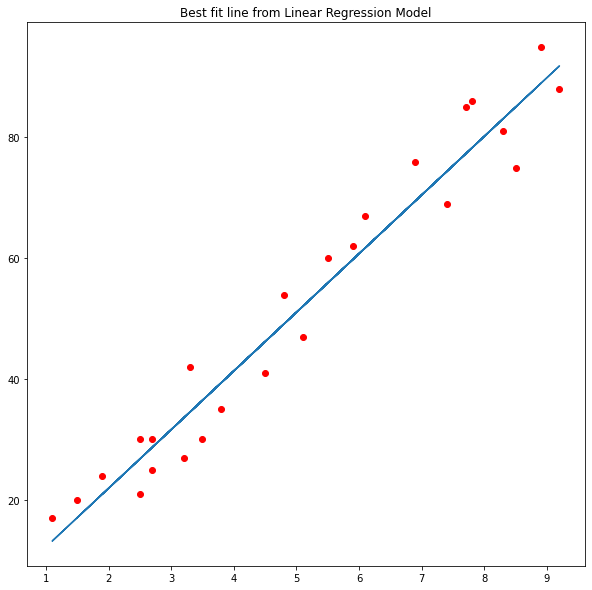

In [41]:
line = m*X+c
plt.scatter(X,y,c='r')
plt.plot(X,line)
plt.title("Best fit line from Linear Regression Model")
plt.show()

### Predicting the score for given number of study hours

In [43]:
hours = float(input("Number of study hours: "))
own_pred = model.predict(np.array(hours).reshape(-1,1))
print("Predicted Score = {}".format(own_pred[0]))

Number of study hours: 9.25
Predicted Score = 92.33571987331146


## Thank you for reviewing this 🙂